# Preliminaries

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [83]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

warnings.filterwarnings('ignore')

# Data Extraction

In [84]:
path = "./Resources/Datasets"
SalesData = pd.read_csv(path + '/sales_data.csv')
WeekData = pd.read_csv(path + '/week_data.csv')
ProductData = pd.read_csv(path + '/product_data.csv')
OutletsData = pd.read_csv(path + '/outlets_data.csv')
FreezerData = pd.read_csv(path + '/freezer_data.csv')

In [85]:
WeekData['Week'] = WeekData['Week'].str.replace('Week ', '').astype(int)
#rename the column to 'week'
WeekData.rename(columns={'Week':'week'}, inplace=True)

In [86]:
CombinedData = pd.merge(SalesData, WeekData, left_on='week', right_on='week')
CombinedData.drop(['product_name'], axis=1, inplace=True)
CombinedData = pd.merge(CombinedData, ProductData, on='pid')
CombinedData = pd.merge(CombinedData, OutletsData, on='Outlet_ID')

In [87]:
CombinedData.head()

,Outlet_ID,week,pid,no_units,Start Date,End Date,volume,product_name,price,area(sqft)
0,ID7203,1,IP1,874.0,1/2/2023,1/8/2023,0.2,Vanilla Mini Cone,100,5660
1,ID7203,2,IP1,644.0,1/9/2023,1/15/2023,0.2,Vanilla Mini Cone,100,5660
2,ID7203,3,IP1,600.0,1/16/2023,1/22/2023,0.2,Vanilla Mini Cone,100,5660
3,ID7203,4,IP1,106.0,1/23/2023,1/29/2023,0.2,Vanilla Mini Cone,100,5660
4,ID7203,5,IP1,775.0,1/30/2023,2/5/2023,0.2,Vanilla Mini Cone,100,5660


# Analysis

<Axes: >

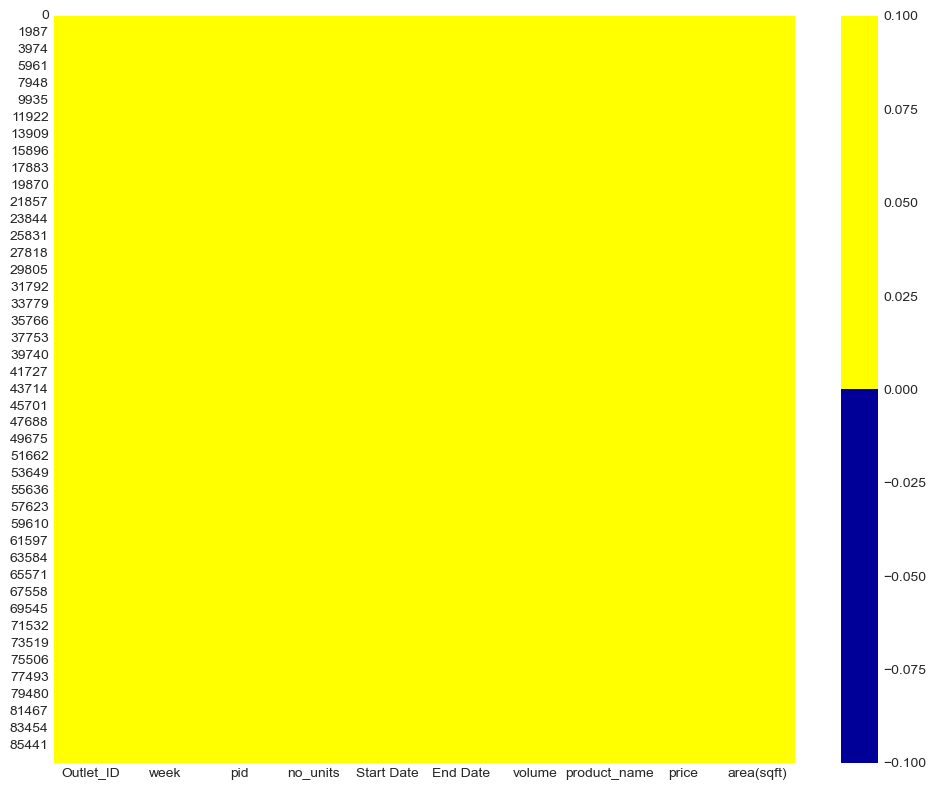

In [88]:
plt.figure(figsize=(10,8))
cols = CombinedData.columns
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(CombinedData[cols].isna(), cmap=sns.color_palette(colours))

No missing data

# Preprocessing

In [89]:
from datetime import datetime
import os

def clean_data(CombinedData):
    # Drop duplicate rows across all columns
    CombinedData = CombinedData.drop_duplicates()
    # Derive column 'start_month' from column: 'Start Date'
    
    def start_month(Start_Date):
        """
        Transform "Start_Date" as per the following examples:
          1/2/2023 ==> 1
        """
        date1 = datetime.strptime(Start_Date, "%m/%d/%Y")
        date_format1 = '%-m' if os.name != 'nt' else '%#m'
        return date1.strftime(date_format1)
    
    CombinedData.insert(5, "start_month", CombinedData.apply(lambda row : start_month(row["Start Date"]), axis=1))
    # Derive column 'start_date' from column: 'Start Date'
    
    def start_date(Start_Date):
        """
        Transform "Start_Date" as per the following examples:
          1/2/2023 ==> 2
        """
        date1 = datetime.strptime(Start_Date, "%m/%d/%Y")
        date_format1 = '%-d' if os.name != 'nt' else '%#d'
        return date1.strftime(date_format1)
    
    CombinedData.insert(5, "start_date", CombinedData.apply(lambda row : start_date(row["Start Date"]), axis=1))
    # Drop column: 'Start Date'
    CombinedData = CombinedData.drop(columns=['Start Date'])
    # Derive column 'end_month' from column: 'End Date'
    
    def end_month(End_Date):
        """
        Transform "End_Date" as per the following examples:
          1/8/2023 ==> 1
        """
        date1 = datetime.strptime(End_Date, "%m/%d/%Y")
        date_format1 = '%-m' if os.name != 'nt' else '%#m'
        return date1.strftime(date_format1)
    
    CombinedData.insert(7, "end_month", CombinedData.apply(lambda row : end_month(row["End Date"]), axis=1))
    # Derive column 'end_date' from column: 'End Date'
    
    def end_date(End_Date):
        """
        Transform "End_Date" as per the following examples:
          1/8/2023 ==> 8
        """
        date1 = datetime.strptime(End_Date, "%m/%d/%Y")
        date_format1 = '%-d' if os.name != 'nt' else '%#d'
        return date1.strftime(date_format1)
    
    CombinedData.insert(7, "end_date", CombinedData.apply(lambda row : end_date(row["End Date"]), axis=1))
    # Drop column: 'End Date'
    CombinedData = CombinedData.drop(columns=['End Date'])
    return CombinedData

CombinedData_clean = clean_data(CombinedData.copy())


In [90]:
CombinedData_clean.head()

,Outlet_ID,week,pid,no_units,start_date,start_month,end_date,end_month,volume,product_name,price,area(sqft)
0,ID7203,1,IP1,874.0,2,1,8,1,0.2,Vanilla Mini Cone,100,5660
1,ID7203,2,IP1,644.0,9,1,15,1,0.2,Vanilla Mini Cone,100,5660
2,ID7203,3,IP1,600.0,16,1,22,1,0.2,Vanilla Mini Cone,100,5660
3,ID7203,4,IP1,106.0,23,1,29,1,0.2,Vanilla Mini Cone,100,5660
4,ID7203,5,IP1,775.0,30,1,5,2,0.2,Vanilla Mini Cone,100,5660


In [91]:
def clean_data(CombinedData_clean):
    # Drop column: 'pid'
    CombinedData_clean = CombinedData_clean.drop(columns=['pid'])
    # Drop column: 'end_month'
    CombinedData_clean = CombinedData_clean.drop(columns=['end_month'])
    # Drop column: 'end_date'
    CombinedData_clean = CombinedData_clean.drop(columns=['end_date'])
    # Drop column: 'start_month'
    CombinedData_clean = CombinedData_clean.drop(columns=['start_month'])
    # Drop column: 'start_date'
    CombinedData_clean = CombinedData_clean.drop(columns=['start_date'])
    return CombinedData_clean

CombinedData_clean_1 = clean_data(CombinedData_clean.copy())


In [92]:
CombinedData_clean_1.head()

,Outlet_ID,week,no_units,volume,product_name,price,area(sqft)
0,ID7203,1,874.0,0.2,Vanilla Mini Cone,100,5660
1,ID7203,2,644.0,0.2,Vanilla Mini Cone,100,5660
2,ID7203,3,600.0,0.2,Vanilla Mini Cone,100,5660
3,ID7203,4,106.0,0.2,Vanilla Mini Cone,100,5660
4,ID7203,5,775.0,0.2,Vanilla Mini Cone,100,5660


# Feature Encoding

In [93]:
def clean_data(CombinedData_clean_1):
    # Drop duplicate rows across all columns
    CombinedData_clean_1 = CombinedData_clean_1.drop_duplicates()
    # Change column type to category for column: 'Outlet_ID'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'Outlet_ID': 'category'})
    # Change column type to float64 for column: 'week'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'week': 'float64'})
    # Change column type to int64 for column: 'no_units'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'no_units': 'int64'})
    # Change column type to float64 for column: 'volume'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'volume': 'float64'})
    # Change column type to category for column: 'product_name'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'product_name': 'category'})
    # Change column type to object for column: 'product_name'
    CombinedData_clean_1 = CombinedData_clean_1.astype({'product_name': 'object'})
    # One-hot encode column: 'product_name'
    CombinedData_clean_1 = pd.get_dummies(CombinedData_clean_1, columns=['product_name'])
    # Derive column 'total_volume' from columns: 'no_units', 'volume'
    def total_volume(no_units, volume):
        """
        Transform "no_units", "volume" as per the following examples:
          874, 0.2 ==> 174.8
          644, 0.2 ==> 128.8
          106, 0.2 ==> 21.2
        """
        number1 = volume * no_units
        return f"{number1:03.1f}"
    
    CombinedData_clean_1.insert(4, "total_volume", CombinedData_clean_1.apply(lambda row : total_volume(row["no_units"], row["volume"]), axis=1))
    # Derive column 'total_price' from columns: 'no_units', 'price'
    def total_price(no_units, price):
        """
        Transform "no_units", "price" as per the following examples:
          874, 100 ==> 87400
          644, 100 ==> 64400
          105, 90 ==> 9450
        """
        number1 = price * no_units
        return f"{number1:01.0f}"
    
    CombinedData_clean_1.insert(6, "total_price", CombinedData_clean_1.apply(lambda row : total_price(row["no_units"], row["price"]), axis=1))
    # Derive column 'volume_per_price' from columns: 'total_volume', 'total_price'
    def volume_per_price(total_price, total_volume):
        """
        Transform "total_price", "total_volume" as per the following examples:
          64400, 128.8 ==> 500
          64400, 128.8 ==> 500
          87400, 174.8 ==> 500
        """
        number1 = float(total_price.replace(",", "")) / float(total_volume.replace(",", ""))
        return f"{number1:01.0f}"
    
    CombinedData_clean_1.insert(7, "volume_per_price", CombinedData_clean_1.apply(lambda row : volume_per_price(row["total_price"], row["total_volume"]), axis=1))
    return CombinedData_clean_1

CombinedData_clean_2 = clean_data(CombinedData_clean_1.copy())


In [94]:
CombinedData_clean_2.head()

,Outlet_ID,week,no_units,volume,total_volume,price,total_price,volume_per_price,area(sqft),product_name_Butter Pecan Small Stick,product_name_Chocolate Fudge Big Scoop,product_name_Chocolate Petite Bar,product_name_Cookies and Cream Mega Tub,product_name_Mint Bite-size Pop,product_name_Mint Chocolate Chip Family Pack,product_name_Moose Tracks Jumbo Cup,product_name_Rocky Road Mega Tub,product_name_Strawberry Tiny Cup,product_name_Vanilla Mini Cone
0,ID7203,1.0,874,0.2,174.8,100,87400,500,5660,0,0,0,0,0,0,0,0,0,1
1,ID7203,2.0,644,0.2,128.8,100,64400,500,5660,0,0,0,0,0,0,0,0,0,1
2,ID7203,3.0,600,0.2,120.0,100,60000,500,5660,0,0,0,0,0,0,0,0,0,1
3,ID7203,4.0,106,0.2,21.2,100,10600,500,5660,0,0,0,0,0,0,0,0,0,1
4,ID7203,5.0,775,0.2,155.0,100,77500,500,5660,0,0,0,0,0,0,0,0,0,1


# Aggregation

In [95]:
def clean_data(CombinedData_clean_2):
    # Change column type to float64 for column: 'no_units'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'no_units': 'float64'})
    # Change column type to float64 for column: 'total_volume'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'total_volume': 'float64'})
    # Change column type to float64 for column: 'price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'price': 'float64'})
    # Change column type to float64 for column: 'price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'price': 'float64'})
    # Change column type to float64 for column: 'volume_per_price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'volume_per_price': 'float64'})
    # Change column type to float64 for column: 'area(sqft)'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'area(sqft)': 'float64'})
    # Change column type to float64 for column: 'total_price'
    CombinedData_clean_2 = CombinedData_clean_2.astype({'total_price': 'float64'})
    # Performed 19 aggregations grouped on column: 'Outlet_ID'
    CombinedData_clean_2 = CombinedData_clean_2.groupby(['Outlet_ID']).agg(week_skew=('week', 'skew'), no_units_mean=('no_units', 'mean'), volume_mode=('volume', lambda s: s.value_counts().index[0]), total_volume_mean=('total_volume', 'mean'), price_max=('price', 'max'), price_mean=('price', 'mean'), total_price_mean=('total_price', 'mean'), volume_per_price_mean=('volume_per_price', 'mean'), areasqft_mode=('area(sqft)', lambda s: s.value_counts().index[0]), product_name_ButterPecanSmallStick_max=('product_name_Butter Pecan Small Stick', 'max'), product_name_ChocolateFudgeBigScoop_max=('product_name_Chocolate Fudge Big Scoop', 'max'), product_name_ChocolatePetiteBar_max=('product_name_Chocolate Petite Bar', 'max'), product_name_CookiesandCreamMegaTub_max=('product_name_Cookies and Cream Mega Tub', 'max'), product_name_MintBitesizePop_max=('product_name_Mint Bite-size Pop', 'max'), product_name_MintChocolateChipFamilyPack_max=('product_name_Mint Chocolate Chip Family Pack', 'max'), product_name_MooseTracksJumboCup_max=('product_name_Moose Tracks Jumbo Cup', 'max'), product_name_RockyRoadMegaTub_max=('product_name_Rocky Road Mega Tub', 'max'), product_name_StrawberryTinyCup_max=('product_name_Strawberry Tiny Cup', 'max'), product_name_VanillaMiniCone_max=('product_name_Vanilla Mini Cone', 'max')).reset_index()
    return CombinedData_clean_2

CombinedData_clean_3 = clean_data(CombinedData_clean_2.copy())


In [96]:
CombinedData_clean_3.head()

,Outlet_ID,week_skew,no_units_mean,volume_mode,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,areasqft_mode,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,ID1008,0.050093,589.321429,0.2,117.864286,110.0,99.642857,58767.678571,498.214286,3387.0,1,0,1,0,1,0,0,0,1,1
1,ID1012,0.004224,60.648148,1.0,60.648148,1200.0,1112.962963,67567.592593,1112.962963,1931.0,0,1,0,1,0,1,1,1,0,0
2,ID1024,-0.034795,126.236364,1.0,126.236364,1200.0,1110.909091,140478.181818,1110.909091,3127.0,0,1,0,1,0,1,1,1,0,0
3,ID1029,0.000406,472.519231,0.2,158.826923,1200.0,575.096154,128857.307692,787.019231,5294.0,1,1,1,1,1,1,1,1,1,1
4,ID1036,0.071437,287.743119,0.2,80.748624,1200.0,590.825688,58154.770642,796.330275,2584.0,1,1,1,1,1,1,1,1,1,1


# Feature Scaling

In [97]:
def clean_data(CombinedData_clean_3):
    # Scale columns 'week_skew', 'no_units_mean' and 6 other columns between 0 and 1
    new_min, new_max = 0, 1
    old_min, old_max = CombinedData_clean_3['week_skew'].min(), CombinedData_clean_3['week_skew'].max()
    CombinedData_clean_3['week_skew'] = (CombinedData_clean_3['week_skew'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['no_units_mean'].min(), CombinedData_clean_3['no_units_mean'].max()
    CombinedData_clean_3['no_units_mean'] = (CombinedData_clean_3['no_units_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['total_volume_mean'].min(), CombinedData_clean_3['total_volume_mean'].max()
    CombinedData_clean_3['total_volume_mean'] = (CombinedData_clean_3['total_volume_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['price_max'].min(), CombinedData_clean_3['price_max'].max()
    CombinedData_clean_3['price_max'] = (CombinedData_clean_3['price_max'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['price_mean'].min(), CombinedData_clean_3['price_mean'].max()
    CombinedData_clean_3['price_mean'] = (CombinedData_clean_3['price_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['total_price_mean'].min(), CombinedData_clean_3['total_price_mean'].max()
    CombinedData_clean_3['total_price_mean'] = (CombinedData_clean_3['total_price_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['volume_per_price_mean'].min(), CombinedData_clean_3['volume_per_price_mean'].max()
    CombinedData_clean_3['volume_per_price_mean'] = (CombinedData_clean_3['volume_per_price_mean'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = CombinedData_clean_3['areasqft_mode'].min(), CombinedData_clean_3['areasqft_mode'].max()
    CombinedData_clean_3['areasqft_mode'] = (CombinedData_clean_3['areasqft_mode'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    return CombinedData_clean_3

CombinedData_clean_4 = clean_data(CombinedData_clean_3.copy())
CombinedData_clean_4.head()

,Outlet_ID,week_skew,no_units_mean,volume_mode,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,areasqft_mode,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,ID1008,0.595413,0.739831,0.2,0.509691,0.0,0.000238,0.212937,0.001953,0.332146,1,0,1,0,1,0,0,0,1,1
1,ID1012,0.477199,0.013260,1.0,0.073546,1.0,0.994208,0.285490,0.990504,0.183983,0,1,0,1,0,1,1,1,0,0
2,ID1024,0.376639,0.103400,1.0,0.573510,1.0,0.992193,0.886623,0.987202,0.305688,0,1,0,1,0,1,1,1,0,0
3,ID1029,0.467359,0.579306,0.2,0.821940,1.0,0.466612,0.790812,0.466368,0.526203,1,1,1,1,1,1,1,1,1,1
4,ID1036,0.650423,0.325363,0.2,0.226767,1.0,0.482041,0.207884,0.481341,0.250432,1,1,1,1,1,1,1,1,1,1


In [98]:
def clean_data(CombinedData_clean_4):
    # Derive column 'ID' from column: 'Outlet_ID'
    # Transform "Outlet_ID" as per the following examples:
    #   ID1008 ==> 1008
    CombinedData_clean_4.insert(1, "ID", CombinedData_clean_4["Outlet_ID"].str[2:])
    # Drop column: 'Outlet_ID'
    CombinedData_clean_4 = CombinedData_clean_4.drop(columns=['Outlet_ID'])
    # Change column type to category for column: 'ID'
    CombinedData_clean_4 = CombinedData_clean_4.astype({'ID': 'category'})
    # Drop column: 'ID'
    CombinedData_clean_4 = CombinedData_clean_4.drop(columns=['ID'])
    return CombinedData_clean_4

CombinedData_clean_5 = clean_data(CombinedData_clean_4.copy())
CombinedData_clean_5.head()

,week_skew,no_units_mean,volume_mode,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,areasqft_mode,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,0.595413,0.739831,0.2,0.509691,0.0,0.000238,0.212937,0.001953,0.332146,1,0,1,0,1,0,0,0,1,1
1,0.477199,0.013260,1.0,0.073546,1.0,0.994208,0.285490,0.990504,0.183983,0,1,0,1,0,1,1,1,0,0
2,0.376639,0.103400,1.0,0.573510,1.0,0.992193,0.886623,0.987202,0.305688,0,1,0,1,0,1,1,1,0,0
3,0.467359,0.579306,0.2,0.821940,1.0,0.466612,0.790812,0.466368,0.526203,1,1,1,1,1,1,1,1,1,1
4,0.650423,0.325363,0.2,0.226767,1.0,0.482041,0.207884,0.481341,0.250432,1,1,1,1,1,1,1,1,1,1


In [106]:
def clean_data(CombinedData_clean_5):
    # Change column type to category for column: 'product_name_ButterPecanSmallStick_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_ButterPecanSmallStick_max': 'category'})
    # Change column type to category for column: 'product_name_ChocolateFudgeBigScoop_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_ChocolateFudgeBigScoop_max': 'category'})
    # Change column type to category for column: 'product_name_ChocolatePetiteBar_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_ChocolatePetiteBar_max': 'category'})
    # Change column type to category for column: 'product_name_MintBitesizePop_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_MintBitesizePop_max': 'category'})
    # Change column type to category for column: 'product_name_CookiesandCreamMegaTub_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_CookiesandCreamMegaTub_max': 'category'})
    # Change column type to category for column: 'product_name_MintChocolateChipFamilyPack_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_MintChocolateChipFamilyPack_max': 'category'})
    # Change column type to category for column: 'product_name_MooseTracksJumboCup_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_MooseTracksJumboCup_max': 'category'})
    # Change column type to category for column: 'product_name_RockyRoadMegaTub_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_RockyRoadMegaTub_max': 'category'})
    # Change column type to category for column: 'product_name_StrawberryTinyCup_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_StrawberryTinyCup_max': 'category'})
    # Change column type to category for column: 'product_name_VanillaMiniCone_max'
    CombinedData_clean_5 = CombinedData_clean_5.astype({'product_name_VanillaMiniCone_max': 'category'})
    return CombinedData_clean_5

CombinedData_clean_6 = clean_data(CombinedData_clean_5.copy())
CombinedData_clean_6.head()

,week_skew,no_units_mean,volume_mode,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,areasqft_mode,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
0,0.595413,0.739831,0.2,0.509691,0.0,0.000238,0.212937,0.001953,0.332146,1,0,1,0,1,0,0,0,1,1
1,0.477199,0.013260,1.0,0.073546,1.0,0.994208,0.285490,0.990504,0.183983,0,1,0,1,0,1,1,1,0,0
2,0.376639,0.103400,1.0,0.573510,1.0,0.992193,0.886623,0.987202,0.305688,0,1,0,1,0,1,1,1,0,0
3,0.467359,0.579306,0.2,0.821940,1.0,0.466612,0.790812,0.466368,0.526203,1,1,1,1,1,1,1,1,1,1
4,0.650423,0.325363,0.2,0.226767,1.0,0.482041,0.207884,0.481341,0.250432,1,1,1,1,1,1,1,1,1,1


# Metrics

In [99]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

def score_segmentation(model, X):
    # Calculate inertia for K-means clustering
    if isinstance(model, KMeans):
        model.fit(X)
        inertia = model.inertia_
    else:
        inertia = None

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, model.labels_)

    # Calculate Davies-Bouldin index
    db_index = davies_bouldin_score(X, model.labels_)

    # Calculate Calinski-Harabasz index
    ch_index = calinski_harabasz_score(X, model.labels_)

    # Print the evaluation scores
    print(f"Inertia: {inertia}")
    print(f"Silhouette Coefficient: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Calinski-Harabasz Index: {ch_index}")



# Visualization

In [100]:
from sklearn.decomposition import PCA

def plot_clusters(model, X):
    # Fit the clustering model to the data
    model.fit(X)

    # Get the cluster labels
    labels = model.labels_

    # Perform dimensionality reduction using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a scatter plot of the data colored by cluster label
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='bright')

    # Set the plot title and axis labels
    plt.title('Cluster Plot')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    # Show the plot
    plt.show()


# Baseline Scores

In [101]:
# from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Fit and predict using K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(CombinedData_clean_6)
kmeans_pred = kmeans.predict(CombinedData_clean_6)

# Evaluate the K-means model
print("K-Means Clustering Results:")
score_segmentation(kmeans, CombinedData_clean_6)
print()


K-Means Clustering Results:
Inertia: 197.72237708799042
Silhouette Coefficient: 0.6376598095297211
Davies-Bouldin Index: 0.6329011103130551
Calinski-Harabasz Index: 3888.2533341900457



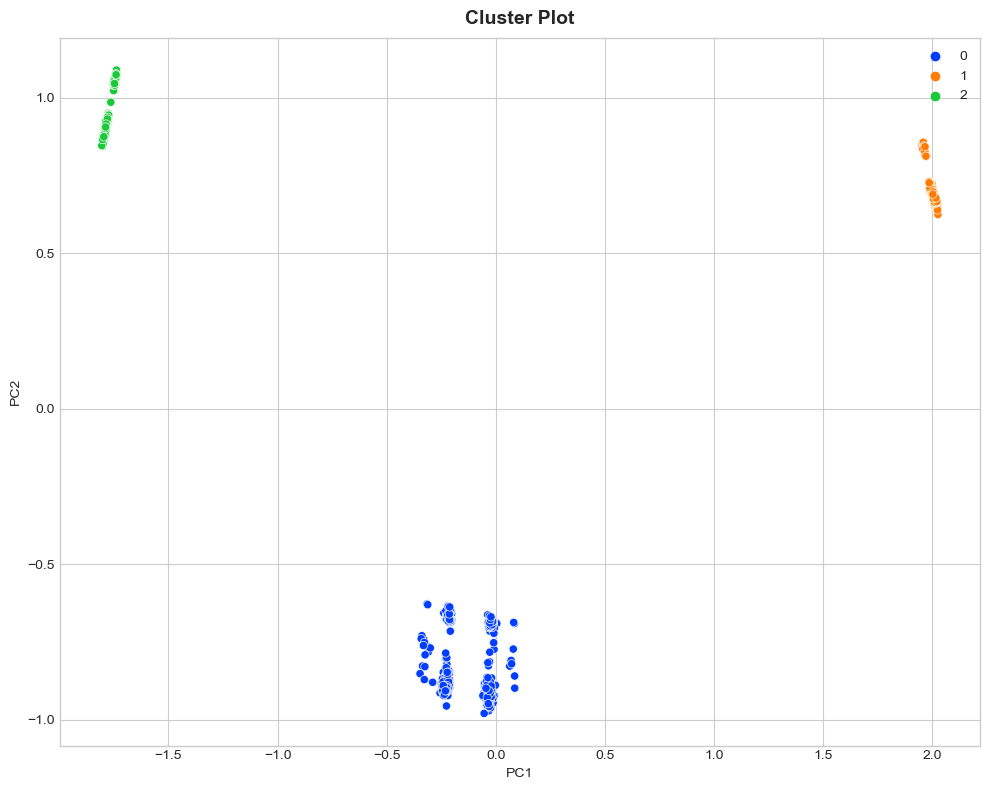

In [66]:
plot_clusters(kmeans, CombinedData_clean_6)

In [102]:

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_pred = agglo.fit_predict(CombinedData_clean_6)

# Evaluate the Agglomerative model
print("Agglomerative Clustering Results:")
score_segmentation(agglo, CombinedData_clean_6)
print()


Agglomerative Clustering Results:
Inertia: None
Silhouette Coefficient: 0.7228540316199908
Davies-Bouldin Index: 0.44878306680973257
Calinski-Harabasz Index: 3484.5998487652446



In [103]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_pred = dbscan.fit_predict(CombinedData_clean_6)

# Evaluate the DBSCAN model
print("DBSCAN Clustering Results:")
score_segmentation(dbscan, CombinedData_clean_6)

DBSCAN Clustering Results:
Inertia: None
Silhouette Coefficient: 0.5846195638170752
Davies-Bouldin Index: 0.8506254492556105
Calinski-Harabasz Index: 3206.307935928165


# Feature Engineering

In [105]:
corr = CombinedData_clean_6.corr()
corr.style.background_gradient(cmap='coolwarm')

,week_skew,no_units_mean,volume_mode,total_volume_mean,price_max,price_mean,total_price_mean,volume_per_price_mean,areasqft_mode,product_name_ButterPecanSmallStick_max,product_name_ChocolateFudgeBigScoop_max,product_name_ChocolatePetiteBar_max,product_name_CookiesandCreamMegaTub_max,product_name_MintBitesizePop_max,product_name_MintChocolateChipFamilyPack_max,product_name_MooseTracksJumboCup_max,product_name_RockyRoadMegaTub_max,product_name_StrawberryTinyCup_max,product_name_VanillaMiniCone_max
week_skew,1.000000,0.056955,-0.030020,0.024153,-0.014526,-0.035293,-0.013975,-0.035234,0.007068,0.043441,-0.014526,0.043441,-0.014526,0.043441,-0.014526,-0.014526,-0.014526,0.043441,0.043441
no_units_mean,0.056955,1.000000,-0.633307,0.623211,-0.596748,-0.841257,0.008922,-0.841086,0.294890,0.768495,-0.596748,0.768495,-0.596748,0.768495,-0.596748,-0.596748,-0.596748,0.768495,0.768495
volume_mode,-0.030020,-0.633307,1.000000,-0.163739,0.574708,0.723947,0.289678,0.723933,0.070058,-0.561409,0.574708,-0.561409,0.574708,-0.561409,0.574708,0.574708,0.574708,-0.561409,-0.561409
total_volume_mean,0.024153,0.623211,-0.163739,1.000000,0.036885,-0.157121,0.787546,-0.156807,0.692329,0.293223,0.036885,0.293223,0.036885,0.293223,0.036885,0.036885,0.036885,0.293223,0.293223
price_max,-0.014526,-0.596748,0.574708,0.036885,1.000000,0.815469,0.517351,0.815524,0.193654,-0.322646,1.000000,-0.322646,1.000000,-0.322646,1.000000,1.000000,1.000000,-0.322646,-0.322646
price_mean,-0.035293,-0.841257,0.723947,-0.157121,0.815469,1.000000,0.461913,0.999988,0.093016,-0.805594,0.815469,-0.805594,0.815469,-0.805594,0.815469,0.815469,0.815469,-0.805594,-0.805594
total_price_mean,-0.013975,0.008922,0.289678,0.787546,0.517351,0.461913,1.000000,0.462205,0.652750,-0.230511,0.517351,-0.230511,0.517351,-0.230511,0.517351,0.517351,0.517351,-0.230511,-0.230511
volume_per_price_mean,-0.035234,-0.841086,0.723933,-0.156807,0.815524,0.999988,0.462205,1.000000,0.093319,-0.805486,0.815524,-0.805486,0.815524,-0.805486,0.815524,0.815524,0.815524,-0.805486,-0.805486
areasqft_mode,0.007068,0.294890,0.070058,0.692329,0.193654,0.093016,0.652750,0.093319,1.000000,0.051156,0.193654,0.051156,0.193654,0.051156,0.193654,0.193654,0.193654,0.051156,0.051156
product_name_ButterPecanSmallStick_max,0.043441,0.768495,-0.561409,0.293223,-0.322646,-0.805594,-0.230511,-0.805486,0.051156,1.000000,-0.322646,1.000000,-0.322646,1.000000,-0.322646,-0.322646,-0.322646,1.000000,1.000000
